In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [8]:
df =  pd.read_csv('vgchartz-2024.csv')
df.shape

(64016, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [12]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [14]:
df.describe().T

count      mean       std  min   25%   50%   75%    max
critic_score   6678.0  7.220440  1.457066  1.0  6.40  7.50  8.30  10.00
total_sales   18922.0  0.349113  0.807462  0.0  0.03  0.12  0.34  20.32
na_sales      12637.0  0.264740  0.494787  0.0  0.05  0.12  0.28   9.76
jp_sales       6726.0  0.102281  0.168811  0.0  0.02  0.04  0.12   2.13
pal_sales     12824.0  0.149472  0.392653  0.0  0.01  0.04  0.14   9.85
other_sales   15128.0  0.043041  0.126643  0.0  0.00  0.01  0.03   3.12

In [16]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

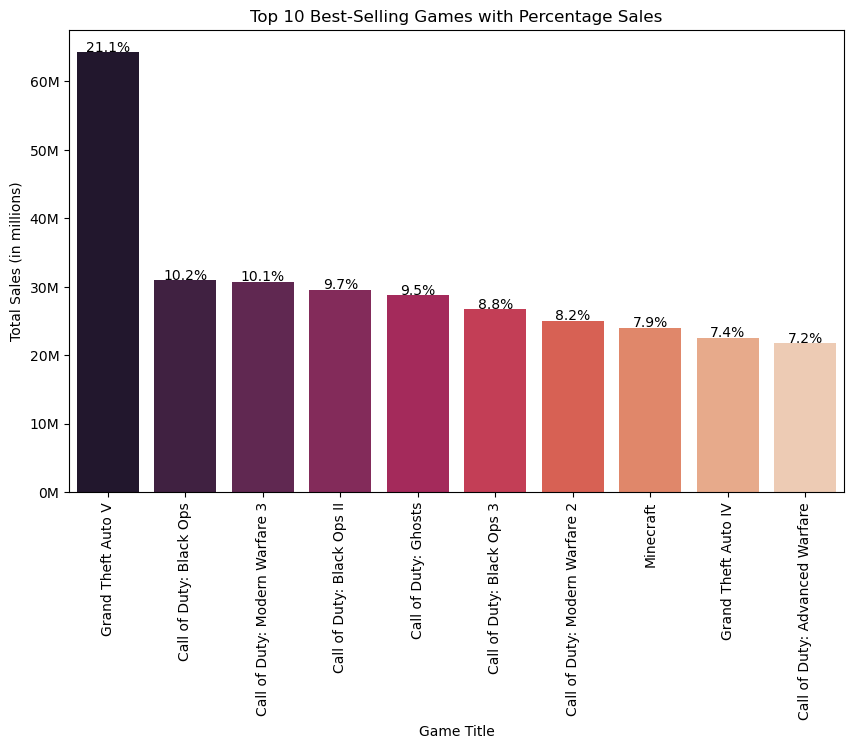

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 selling games
top_selling_games = df.groupby('title', as_index=False)['total_sales'].sum().nlargest(10, 'total_sales')

# Calculate percentage contribution
total_sales_sum = top_selling_games['total_sales'].sum()
top_selling_games['percentage'] = (top_selling_games['total_sales'] / total_sales_sum) * 100

# Plot using seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_selling_games, x='title', y='total_sales', palette='rocket')

# Add percentage labels on top of each bar
for i, (value, percent) in enumerate(zip(top_selling_games['total_sales'], top_selling_games['percentage'])):
    ax.text(i, value + 0.1, f"{percent:.1f}%", ha='center', fontsize=10, color='black')

# Format y-axis to show sales in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.xlabel("Game Title")
plt.ylabel("Total Sales (in millions)")
plt.title("Top 10 Best-Selling Games with Percentage Sales")

# Show the plot
plt.show()

In [42]:
platforms = df.groupby(['title', 'console'])['total_sales'].sum().sort_values(ascending=False).head(10)

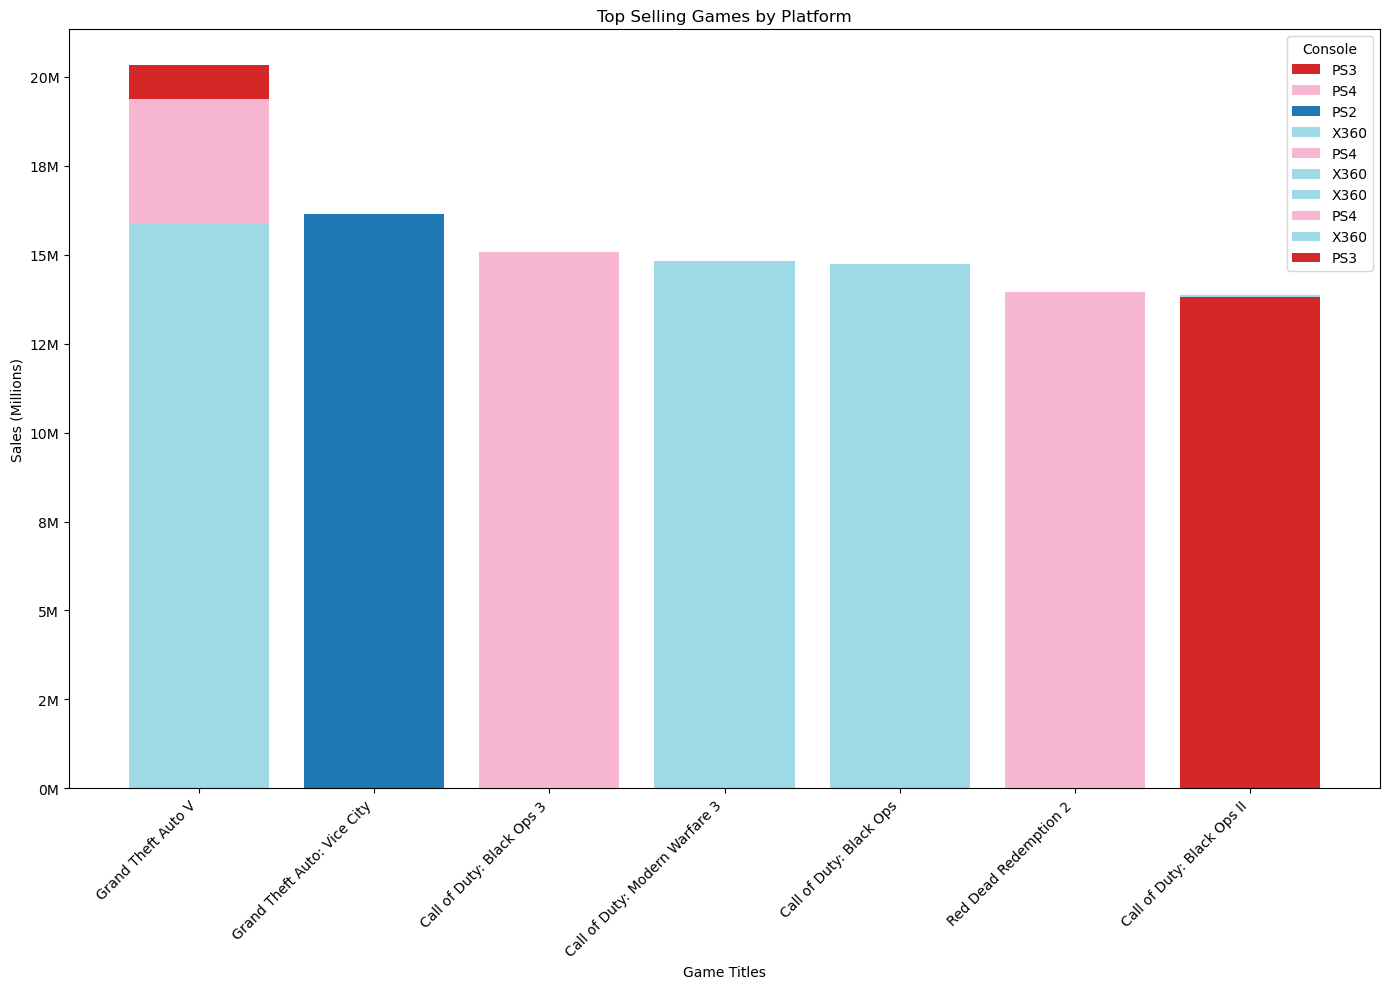

In [44]:
titles = [index[0] for index in platforms.index]
consoles = [index[1] for index in platforms.index]
sales = platforms.values
unique_consoles = np.unique(consoles)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

# Convert sales to millions
sales_in_millions = sales  # dividing by 1 million to get the values in millions
#sales_in_millions = sales / 1e6  # dividing by 1 million to get the values in millions

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], sales_in_millions[i], color=color, label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Selling Games by Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Console',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

In [46]:
genre_stats=df.groupby('genre').agg({
    'critic_score':'median',
    'total_sales':'sum'
})
sorted_genres_by_score=genre_stats.sort_values(by='critic_score',ascending=False)
sorted_genres_by_sales=genre_stats.sort_values(by='total_sales',ascending=False)

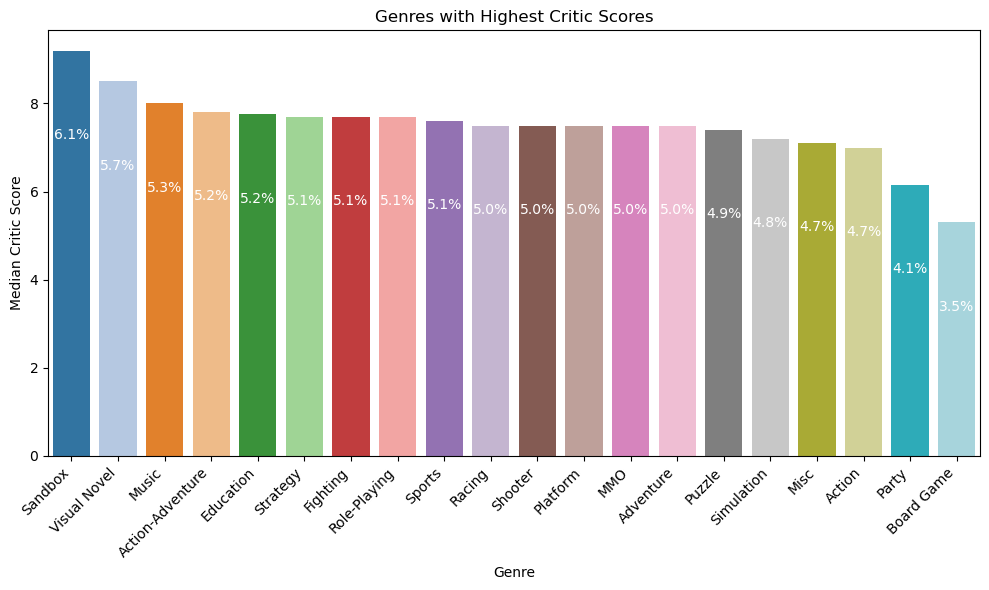

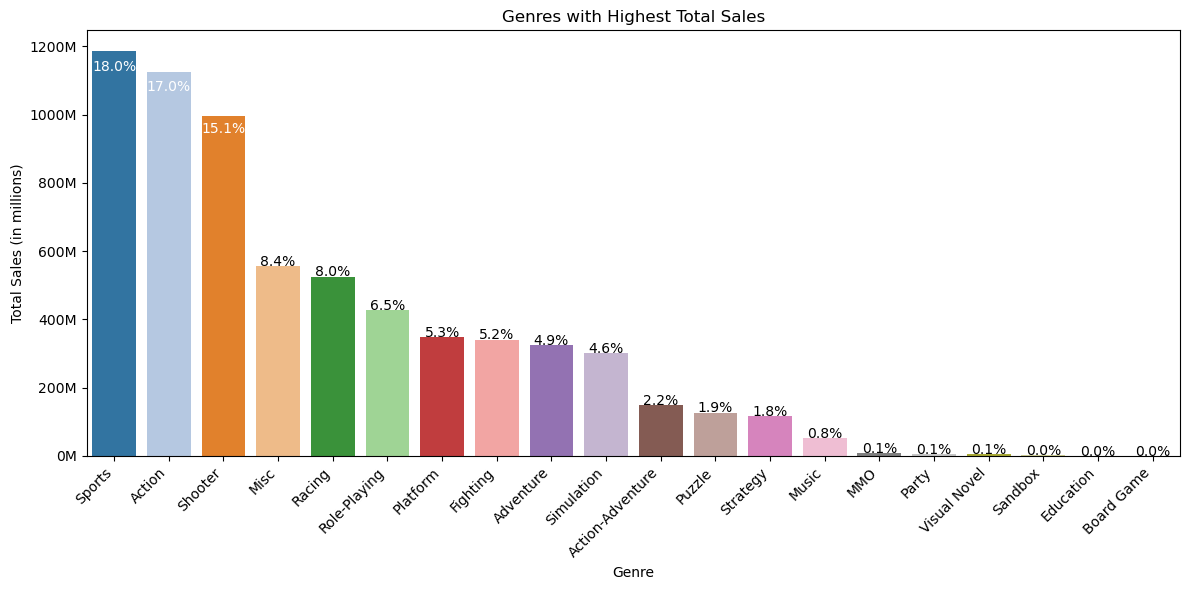

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
palette = sns.color_palette("tab20", len(sorted_genres_by_score))


### 📌 First Plot: Genres with Highest Critic Scores ###
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted_genres_by_score.index, y=sorted_genres_by_score['critic_score'], palette=palette)

# Total sum for percentage calculation
total_score_sum = sorted_genres_by_score['critic_score'].sum()

# Add percentage labels within bars or slightly above
for i, value in enumerate(sorted_genres_by_score['critic_score']):
    percent = f"{(value / total_score_sum) * 100:.1f}%"  # Convert to percentage
    y_position = value - 2 if value > 5 else value + 1  # Adjust for visibility
    ax.text(i, y_position, percent, ha='center', fontsize=10, color='white' if value > 5 else 'black')

# Labels and title
plt.title('Genres with Highest Critic Scores')
plt.xlabel('Genre')
plt.ylabel('Median Critic Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 📌 Second Plot: Genres with Highest Total Sales ###
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['total_sales'], palette=palette)

# Total sum for percentage calculation
total_sales_sum = sorted_genres_by_sales['total_sales'].sum()

# Add percentage labels, ensuring they stay inside the figure
for i, value in enumerate(sorted_genres_by_sales['total_sales']):
    percent = f"{(value / total_sales_sum) * 100:.1f}%"  # Convert to percentage
    y_position = value * 0.95 if value > (total_sales_sum * 0.1) else value + 0.1  # Adjust for visibility
    ax.text(i, y_position, percent, ha='center', fontsize=10, color='white' if value > (total_sales_sum * 0.1) else 'black')

# Format y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Labels and title
plt.title('Genres with Highest Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

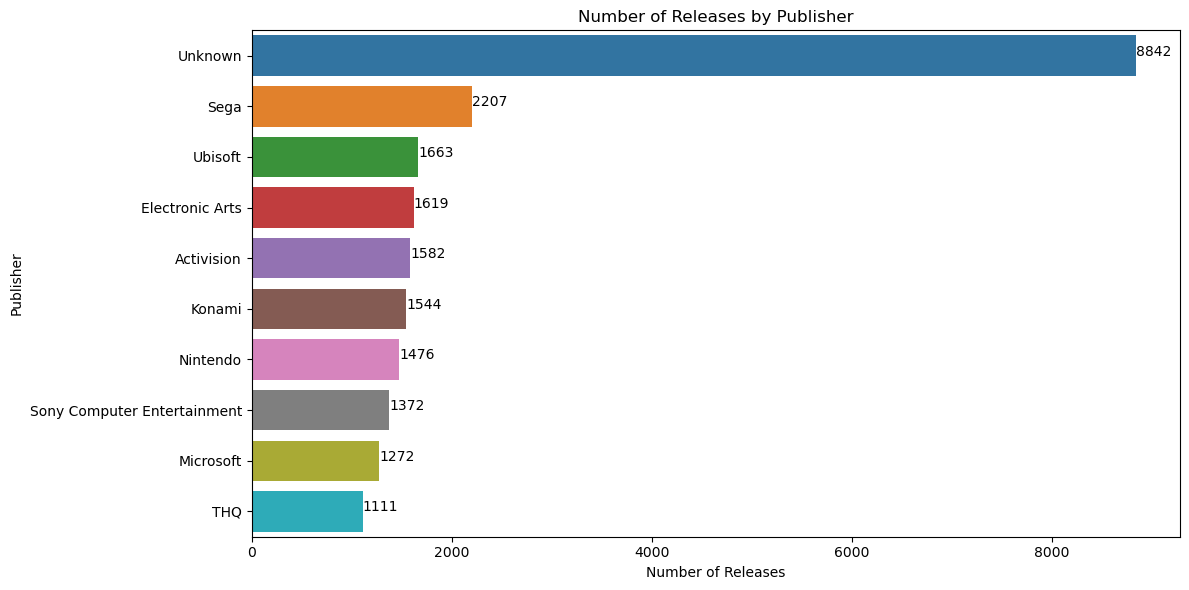

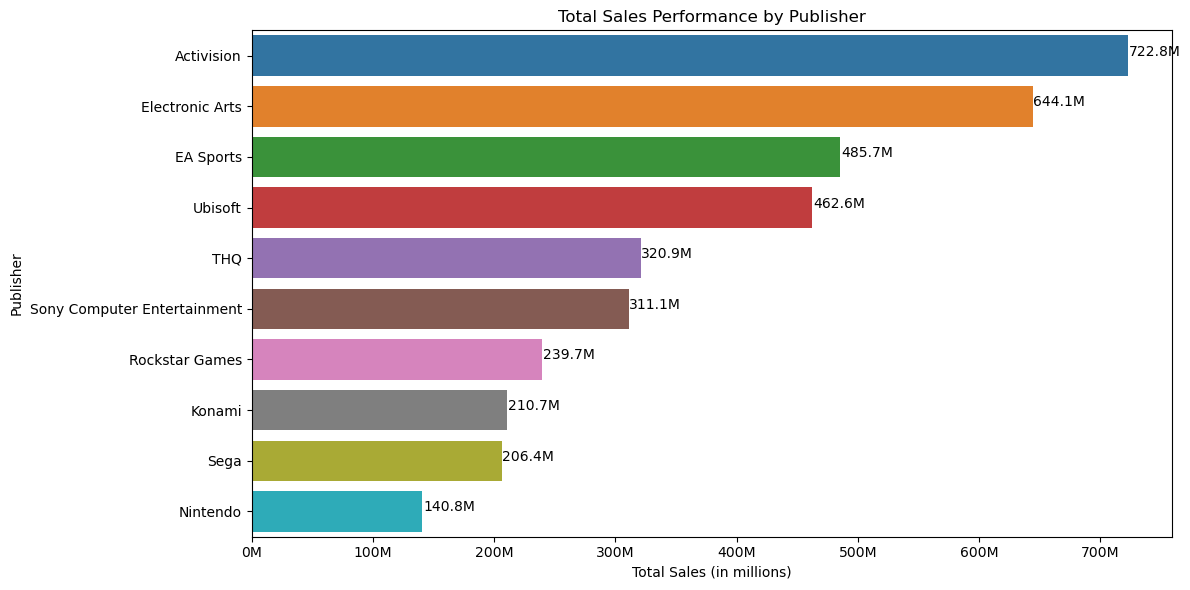

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create color palette
palette = sns.color_palette("tab10", len(sorted_publishers_by_num))

### 📌 First Plot: Number of Releases by Publisher ###
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='title', y='publisher', data=sorted_publishers_by_num, palette=palette)

# Add numerical labels manually
for i, value in enumerate(sorted_publishers_by_num['title']):
    ax.text(value + 1, i, f"{value}", ha='left', fontsize=10, color='black')

plt.title('Number of Releases by Publisher')
plt.xlabel('Number of Releases')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


### 📌 Second Plot: Total Sales Performance by Publisher ###
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales, palette=palette)

# Add numerical labels manually
for i, value in enumerate(sorted_publishers_by_sales['total_sales']):
    ax.text(value + 0.5, i, f"{value:.1f}M", ha='left', fontsize=10, color='black')

# Format x-axis to show sales in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('Total Sales Performance by Publisher')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


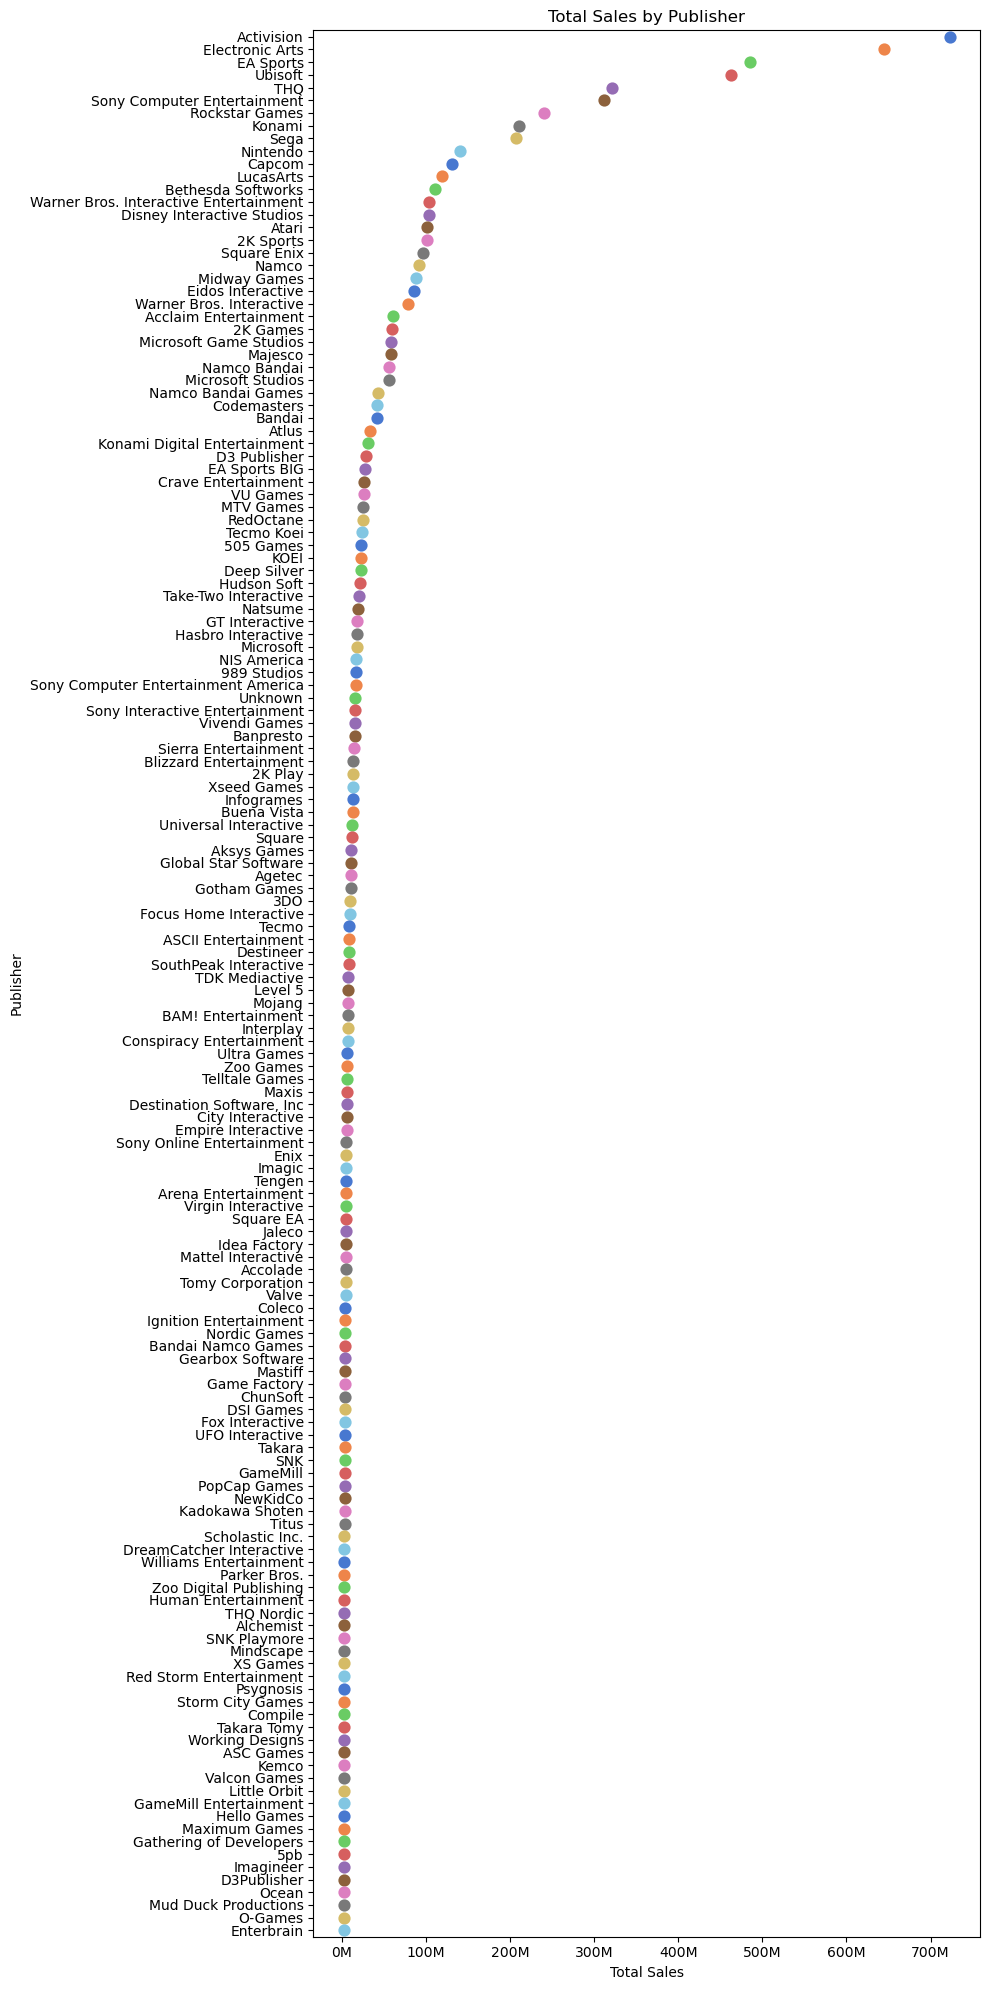

In [58]:
publisher_sales = df.groupby('publisher')['total_sales'].sum().reset_index()

# Sort publishers by total sales
sorted_publishers = publisher_sales.sort_values(by='total_sales', ascending=False).head(150)

# Plot total sales by publisher using a point plot
plt.figure(figsize=(10, 20))
ax=sns.pointplot(x='total_sales', y='publisher', data=sorted_publishers, join=False, palette='muted')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.title('Total Sales by Publisher')
plt.tight_layout()
plt.show()

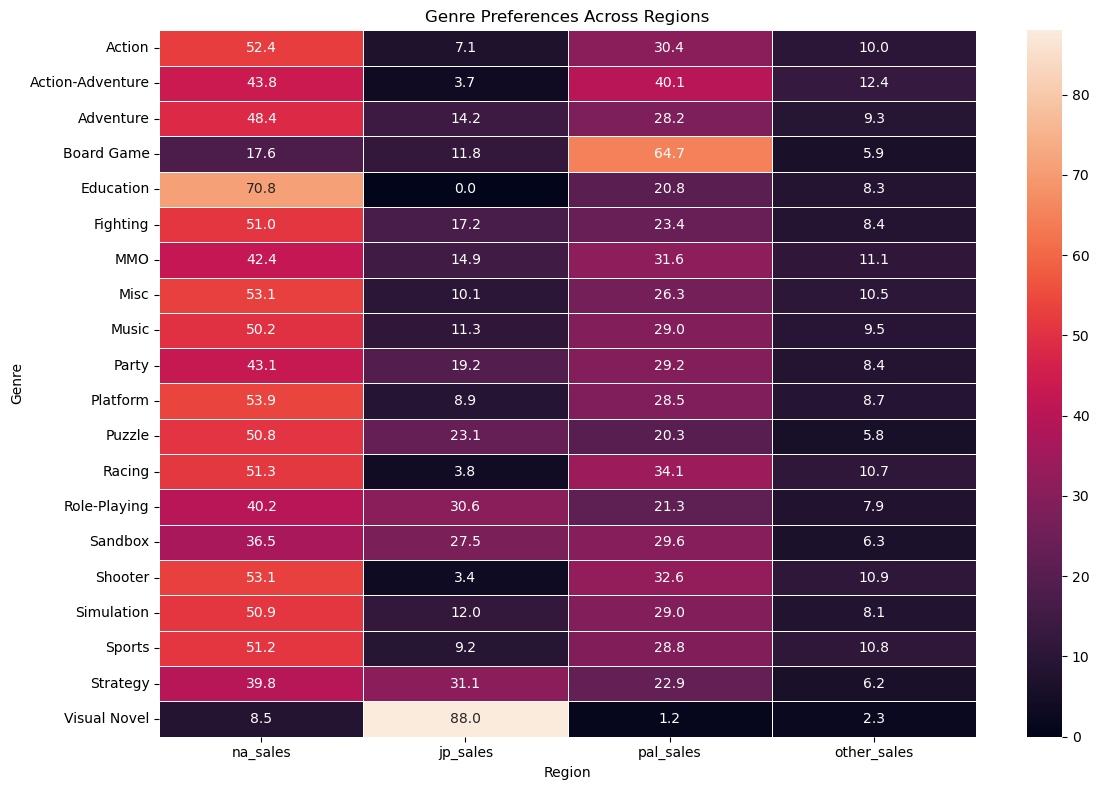

In [60]:
genre_sales = df.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Normalize sales data to get percentages
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_sales_normalized, cmap='rocket', annot=True, fmt='.1f', linewidths=.5)
plt.title('Genre Preferences Across Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

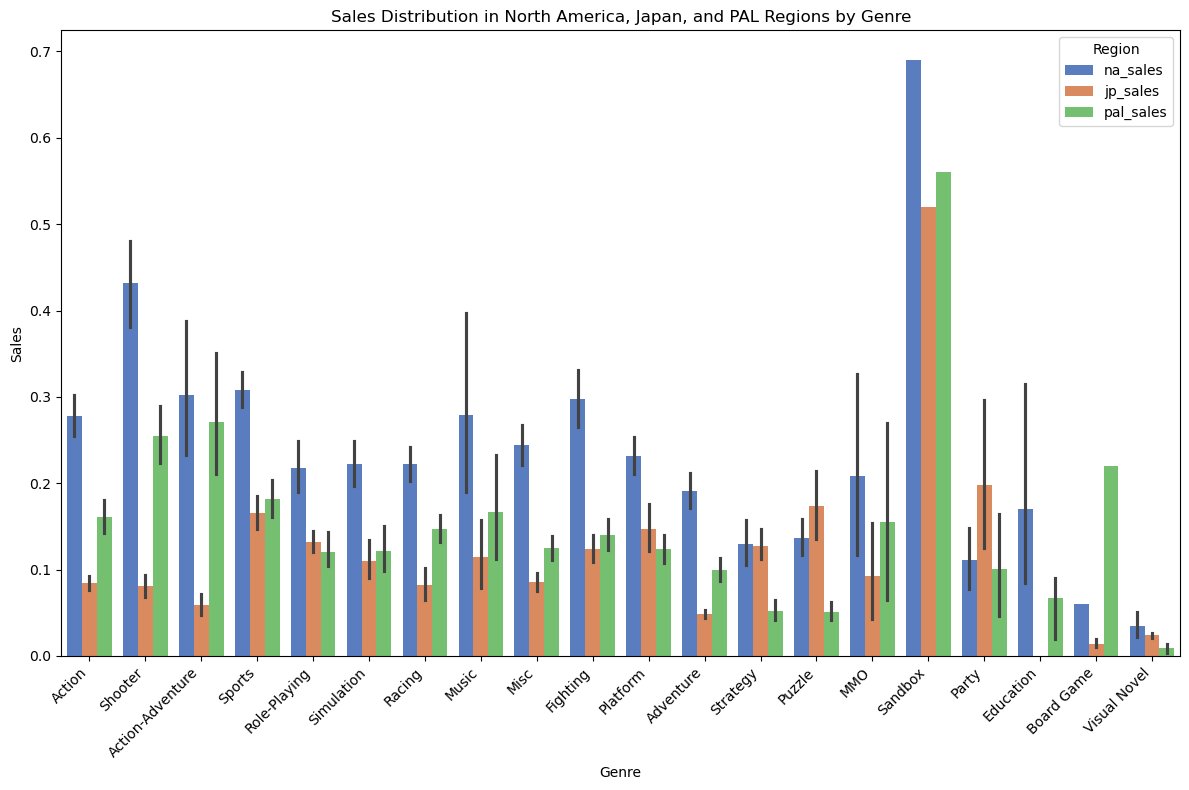

In [62]:
sales_data = df[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

# Melt the DataFrame to long format for easier plotting
sales_data_melted = sales_data.melt(id_vars='genre', var_name='region', value_name='sales')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data_melted, x='genre', y='sales', hue='region', palette='muted')
plt.title('Sales Distribution in North America, Japan, and PAL Regions by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', loc='upper right')
plt.tight_layout()
plt.show()

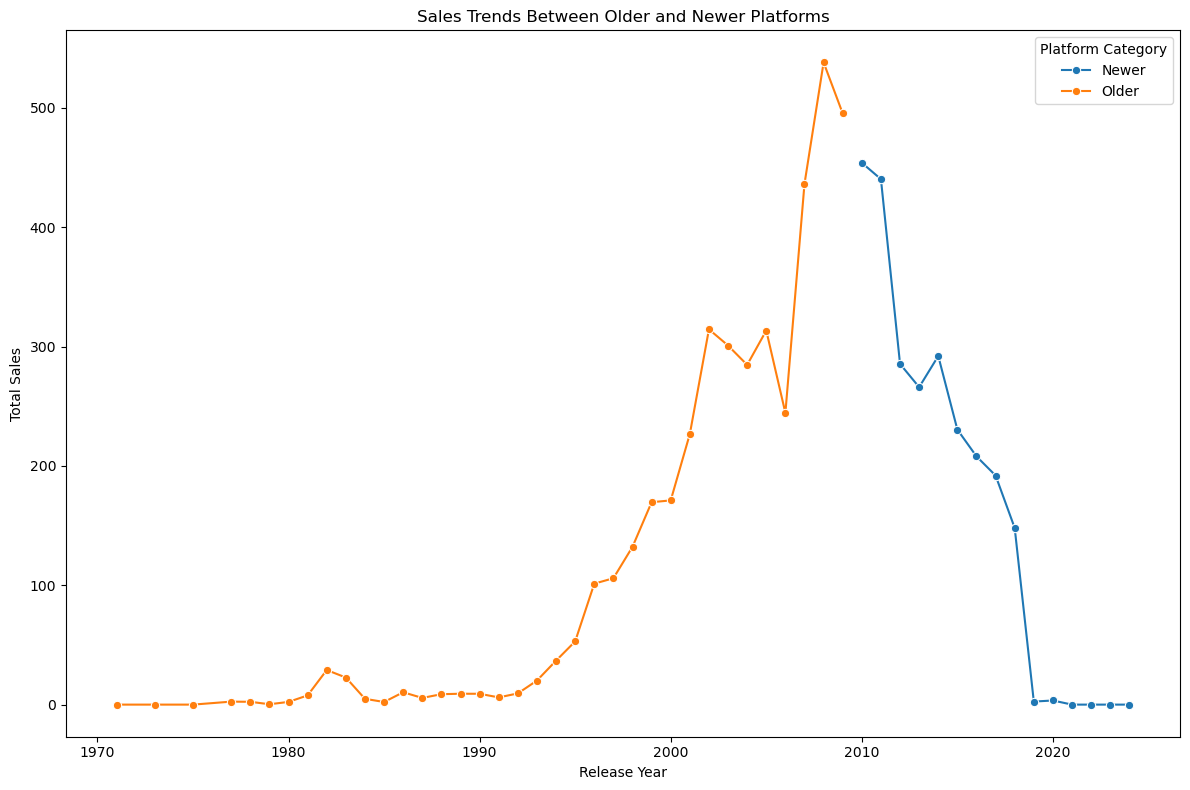

In [64]:
threshold_release_year = 2010

df['release_date'] = pd.to_datetime(df['release_date'])
df['platform_category'] = np.where(df['release_date'].dt.year < threshold_release_year, 'Older', 'Newer')
sales_trends = df.groupby(['platform_category', df['release_date'].dt.year])['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_trends, x='release_date', y='total_sales', hue='platform_category', marker='o')
plt.title('Sales Trends Between Older and Newer Platforms')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.tight_layout()
plt.show()

In [74]:
average_sales_per_game = df.groupby('console')['total_sales'].mean().sort_values(ascending=False)

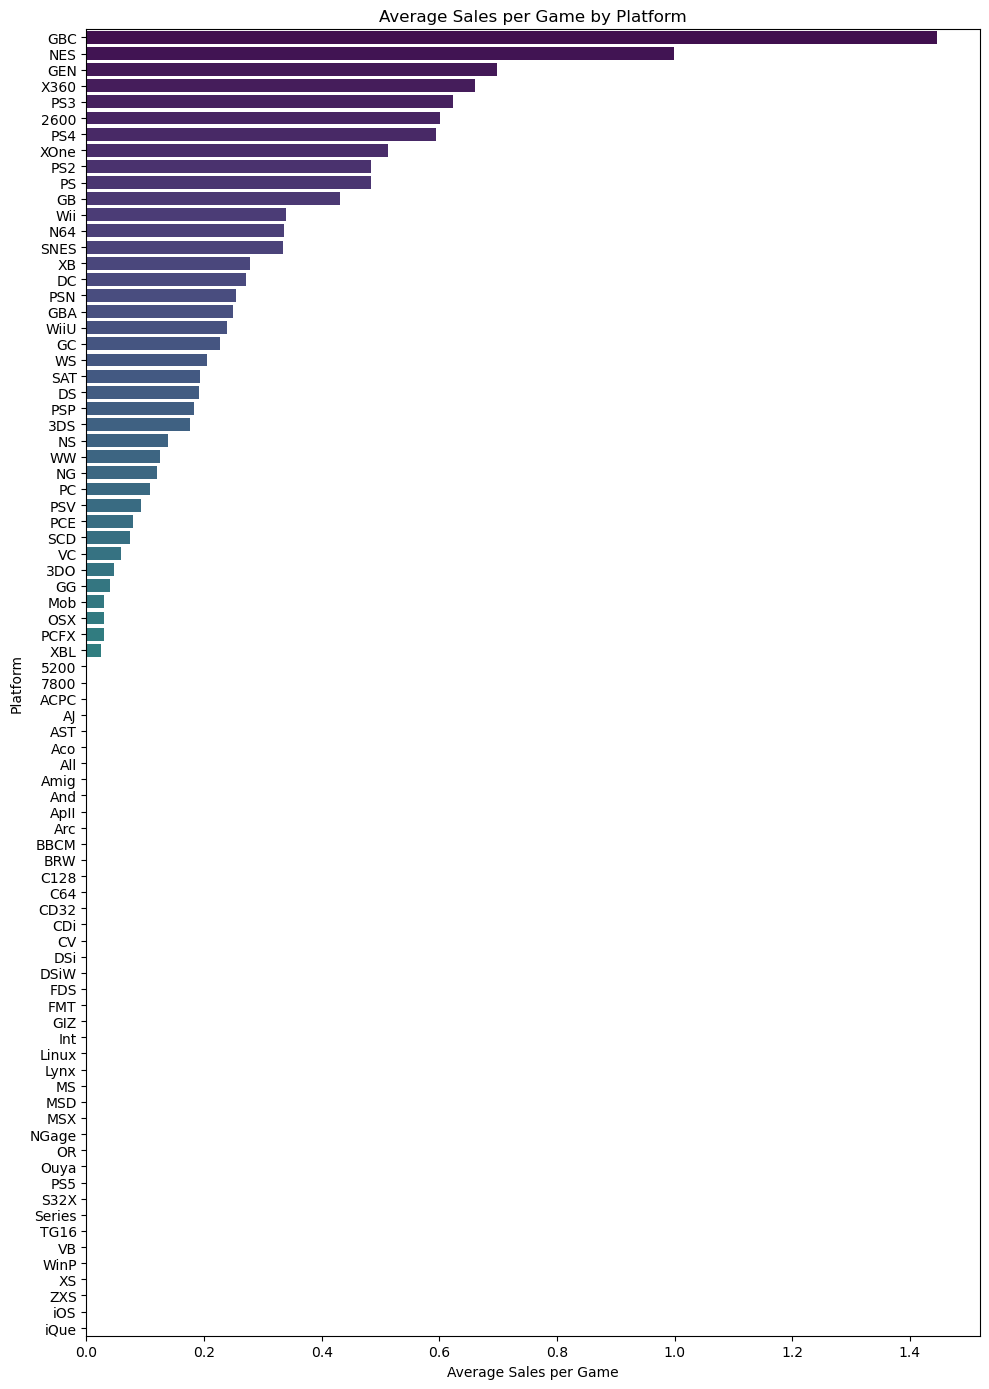

In [76]:
plt.figure(figsize=(10, 14))
sns.barplot(x=average_sales_per_game.values, y=average_sales_per_game.index, palette='viridis')
plt.xlabel('Average Sales per Game')
plt.ylabel('Platform')
plt.title('Average Sales per Game by Platform')
plt.tight_layout()
plt.show()

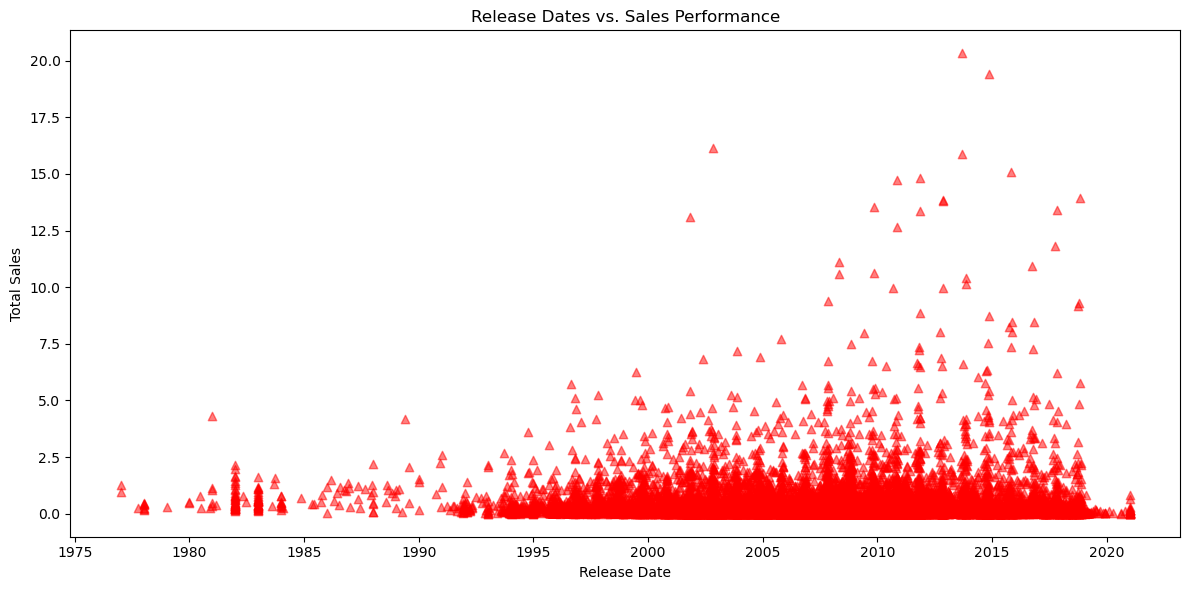

In [78]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['release_date'], df['total_sales'], alpha=0.5,c='r',marker='^')
plt.title('Release Dates vs. Sales Performance')
plt.xlabel('Release Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

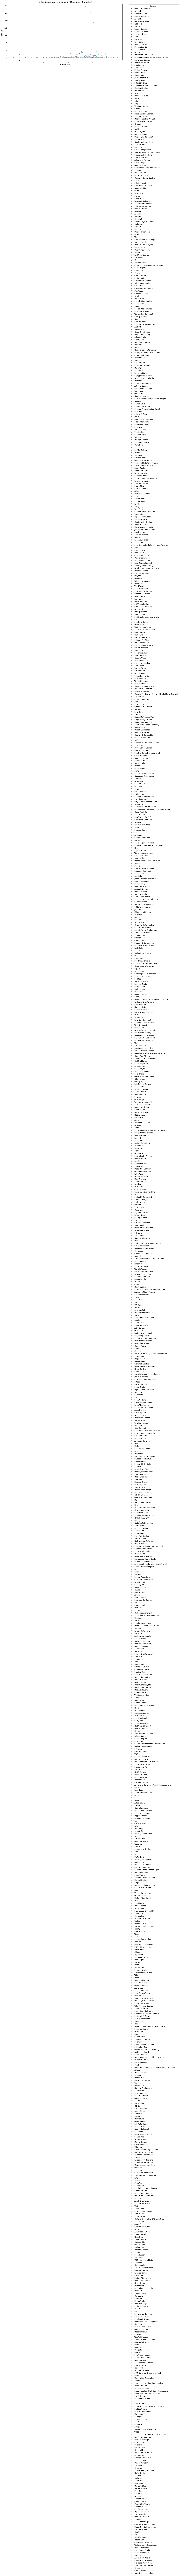

In [80]:
developer_stats = df.groupby('developer').agg({'critic_score': 'mean', 'total_sales': 'sum'}).reset_index()

developer_stats_sample = developer_stats.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=developer_stats_sample, x='critic_score', y='total_sales', hue='developer', palette='viridis', alpha=0.7)
plt.title('Critic Scores vs. Total Sales by Developer (Sampled)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
top_10_critic_score = developer_stats.sort_values(by=['critic_score','total_sales'],kind='quicksort', ascending=[False,False])
filtered_stats = top_10_critic_score[top_10_critic_score['total_sales'] >= 10].head(10)
filtered_stats

developer  critic_score  total_sales
6362          Rockstar Games      9.800000        19.71
4945                  Mojang      9.400000        17.81
5137             Naughty Dog      9.083333        23.47
6366          Rockstar North      9.060870       116.91
7951          Ubisoft Quebec      9.050000        12.32
6374      Rocksteady Studios      9.025000        25.48
1074  Blizzard Entertainment      8.928571        13.60
1248                  Bungie      8.900000        33.44
7885         Turn 10 Studios      8.900000        14.52
7374                    TOSE      8.750000        16.87

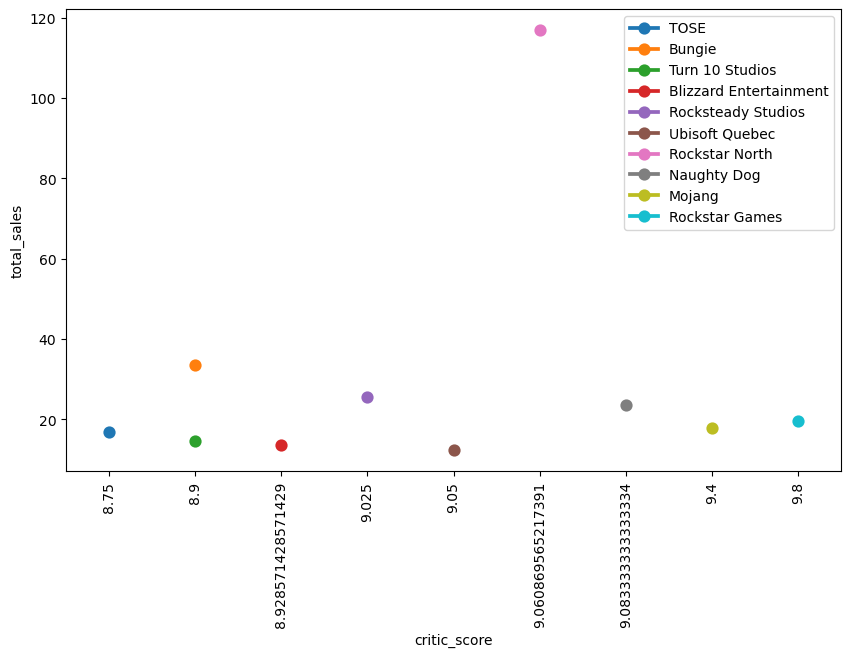

In [84]:
plt.figure(figsize=(10,6))
sns.pointplot(x='critic_score',y='total_sales',hue='developer',data=filtered_stats)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

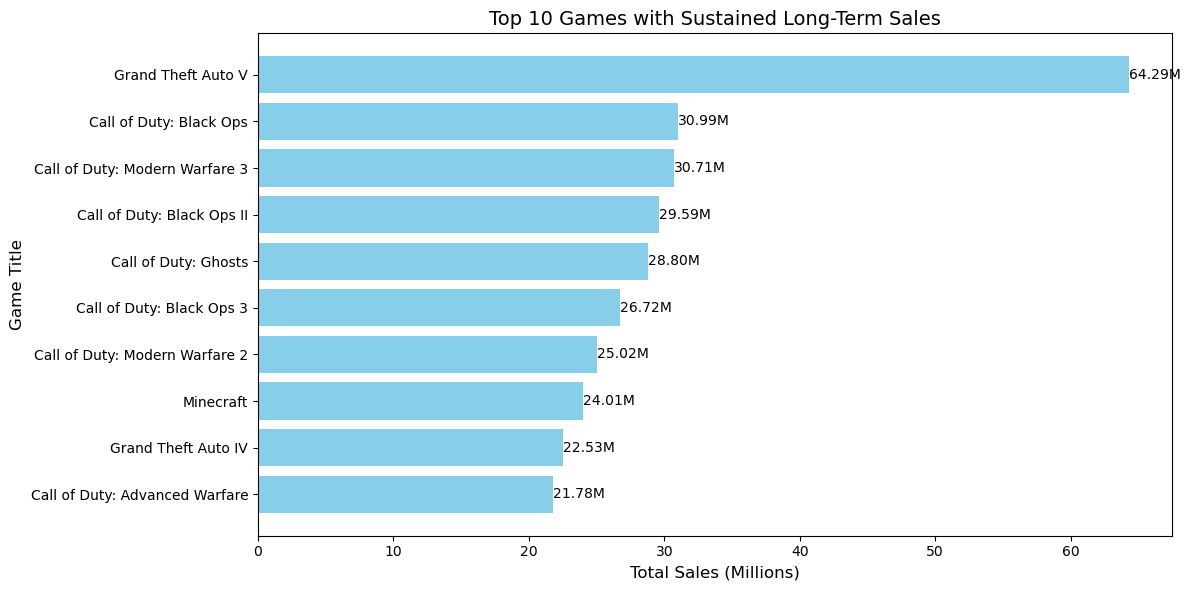

In [86]:
df['release_date'] = pd.to_datetime(df['release_date'])

long_term_period = pd.DateOffset(years=2)

df['long_term_end_date'] = df['release_date'] + long_term_period
long_term_sales = df[df['release_date'] <= df['long_term_end_date']]
long_term_sales_agg = long_term_sales.groupby('title')['total_sales'].sum().reset_index()
long_term_sales_agg = long_term_sales_agg.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(12, 6))
top_n = 10  
plt.barh(long_term_sales_agg['title'].head(top_n), long_term_sales_agg['total_sales'].head(top_n), color='skyblue')
plt.xlabel('Total Sales (Millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.title(f'Top {top_n} Games with Sustained Long-Term Sales', fontsize=14)
plt.gca().invert_yaxis()  

for index, value in enumerate(long_term_sales_agg['total_sales'].head(top_n)):
    plt.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

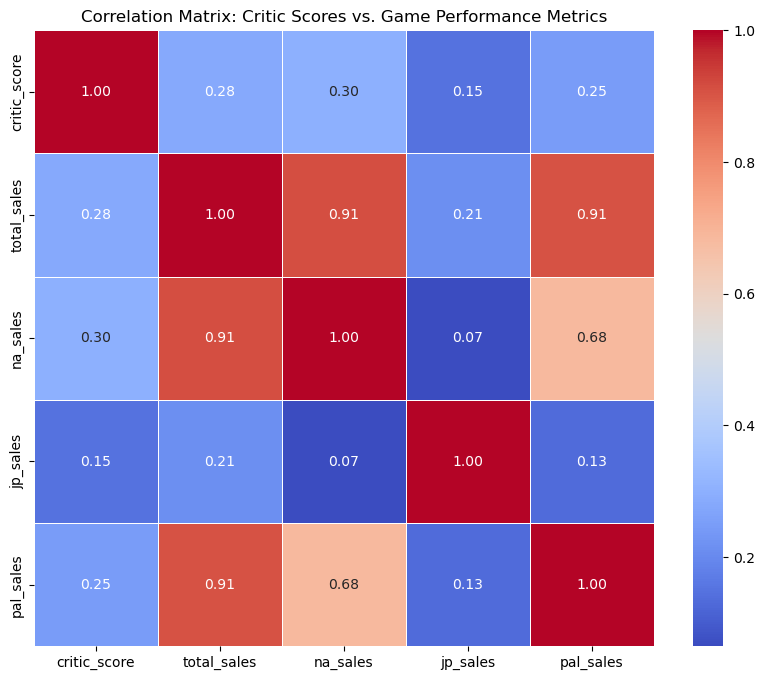

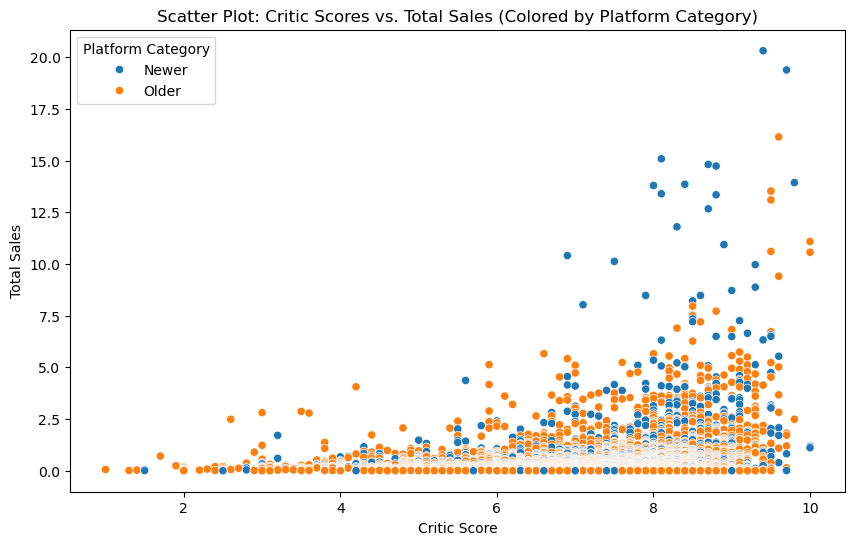

In [88]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Critic Scores vs. Game Performance Metrics')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='critic_score', y='total_sales', hue='platform_category')
plt.title('Scatter Plot: Critic Scores vs. Total Sales (Colored by Platform Category)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.show()